#Evaluación Final - Diplomado Data Science Duoc UC

Grupo 7

Catalina Cretton A.

Jonathan Santander G.

Yasna Vega E.

# Módulo: Machine Learning

A continuación, aplicarás lo aprendido con el uso de las librerías de Python desde fuentes de datos proporcionadas por el relator.

**Recuerda almacenar una copia de este Jupyter Notebook en tu Google Drive para poder ejecutar los bloques de código.**


---
Proponga al menos 6 preguntas que podamos responder con el análisis exploratorio previo a la construcción de un modelo de Machine Learning, que permita hacer una proyección (regresión) o una clasificación de acuerdo al aspecto elegido de los datos.

Detecte correlaciones relevantes que permitan hacer más óptimo el modelo de ML en combinación con los algoritmos e hiperparámetros adecuados de acuerdo a la solución planteada.

Elabore un informe en Jupyter Notebook haciendo uso de cuadros de texto y cuadros de código para robustecer la solución planteada.


Datos: disponibles en el enlace en una de las celdas de este notebook.


---



**Recuerda hacer uso de todo lo aprendido! mientras más cosas descubras de los datos, más robusto será tu análisis.** 

In [1]:
!wget https://www.dropbox.com/s/xitvmn3jdb1r36i/PlayStore.csv

--2022-08-21 23:56:40--  https://www.dropbox.com/s/xitvmn3jdb1r36i/PlayStore.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xitvmn3jdb1r36i/PlayStore.csv [following]
--2022-08-21 23:56:40--  https://www.dropbox.com/s/raw/xitvmn3jdb1r36i/PlayStore.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc463f8e50d1d04ee24512fedb9b.dl.dropboxusercontent.com/cd/0/inline/BrdWLKDpjs9Ud6La113rh7Hij3b5LWWTvMBrfLXllVZ3nTB_tFEOK0Bi2d28tJjfmXtVLxuAjDRFvWnukHSPjD6Evzji1H8YYiDtVFtwqM4E0QPoSHYhHCZXi4MVG6s7Rw23V7R-Z5IlhZ_5oFnsw0fhajRyhRdagC_fcwI95Thnqw/file# [following]
--2022-08-21 23:56:40--  https://uc463f8e50d1d04ee24512fedb9b.dl.dropboxusercontent.com/cd/0/inline/BrdWLKDpjs9Ud6La113rh7Hij3b5LWWTvMBrfLXllVZ3nTB_tFEOK0Bi2d28tJjfm

In [2]:
# Configuración básica inicial
%pylab inline
import re
# Importación de Pandas, Seaborn, Numpy y Matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("precision",5)
####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
## modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# importa libreria para obtener las metricas de la matriz de confusión
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('PlayStore.csv', sep=";")
df

,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación
0,AJ Styles HD Wallpapers,ARTE Y DISEÑO,"4,8",48,25,"5,000 aprox.",Gratis,0,Todo público
1,I Creative Idea,ARTE Y DISEÑO,"4,7",353,"4,2","10,000 aprox.",Gratis,0,Adolescentes
2,Infinite Painter,ARTE Y DISEÑO,"4,1",36815,29,"1,000,000 aprox.",Gratis,0,Todo público
3,FlipaClip - Cartoon animation,ARTE Y DISEÑO,"4,3",194216,39,"5,000,000 aprox.",Gratis,0,Todo público
4,Text on Photo - Fonteee,ARTE Y DISEÑO,"4,4",13880,28,"1,000,000 aprox.",Gratis,0,Todo público
...,...,...,...,...,...,...,...,...,...
9136,BPme - Mobile Fuel Payment & BP Driver Rewards...,VIAJES,3,69,31,"10,000 aprox.",Gratis,0,Todo público
9137,Gormey: Find Best Restaurants,VIAJES,"4,3",34,"7,6","1,000 aprox.",Gratis,0,Todo público
9138,NTES,VIAJES,"4,3",165299,"5,4","10,000,000 aprox.",Gratis,0,Todo público
9139,Urbanspoon Restaurant Reviews,VIAJES,"4,2",35560,13,"5,000,000 aprox.",Gratis,0,Todo público


# Análisis Exploratorio de Datos

In [4]:
# Información del DF
print(df.shape)

# Conociendo el DF
print(df.head(5))

# Describiendo el DF
print(df.describe())

# Conociendo la información
print(df.info())

# Cantidad de descargas
print(df.groupby("Descargas").size())

# Valoracion promedio.
print(df.groupby("Valoración").mean())

# Cantidad de Comentarios.
print(df.groupby("Comentarios").size())

(9141, 9)
                             App      Categoría Valoración  Comentarios  \
0        AJ Styles HD Wallpapers  ARTE Y DISEÑO        4,8           48   
1                I Creative Idea  ARTE Y DISEÑO        4,7          353   
2               Infinite Painter  ARTE Y DISEÑO        4,1        36815   
3  FlipaClip - Cartoon animation  ARTE Y DISEÑO        4,3       194216   
4        Text on Photo - Fonteee  ARTE Y DISEÑO        4,4        13880   

  Tamaño(M)         Descargas    Tipo Precio Clasificación  
0        25      5,000 aprox.  Gratis      0  Todo público  
1       4,2     10,000 aprox.  Gratis      0  Adolescentes  
2        29  1,000,000 aprox.  Gratis      0  Todo público  
3        39  5,000,000 aprox.  Gratis      0  Todo público  
4        28  1,000,000 aprox.  Gratis      0  Todo público  
       Comentarios
count  9.14100e+03
mean   2.49157e+05
std    1.71658e+06
min    0.00000e+00
25%    2.20000e+01
50%    7.42000e+02
75%    2.50940e+04
max    4.48939e+07
<c

## Planteamiento de sus preguntas 

1-Que categoría de app obtuvo mas descargas

2-Qué aplicaciónes obtuvieron mayor valorizacion

3-Qué aplicación obtuvo más comentarios

4-Qué tipos de categorías de aplicaciones hay

5-Que grupo de personas descarga más apliacciones

6-Qué tipo de aplicación tiene mas descargas (Pago/gratis)

# Propuesta de limpieza


1ra Propuesta de limpieza: es modificar la variable "Descargas", debido a que es un tipo de dato object, conteniendo la palabra "aprox."

2da Propuesta de limpieza: es modificar en un nuevo campo la variable "Tipo" Gratis = 0 y Pago= 1, para obtener un tipo númerico .

3ra Propuesta de limpieza: validación y limpieza de datos nulos (null), correponde a datos no valorizados por los clientes que descargan las app, siendo estas gratis o pagadas.

4ta Propuesta de limpieza:  es modificar en un nuevo campo la variable "Clasificación" para obtener un tipo númerico

5ta Propuesta de limpieza: es modificar la variable "Tamaño(m)", debido a que es un tipo de dato object, conteniendo un caracter ",".

6ta Propuesta de limpieza: es modificar la variable "Valoración", debido a que es un tipo de dato object, conteniendo un caracter ","

7ma Propuesta de limpieza: es modificar la variable "Precio", debido a que es un tipo de dato object, conteniendo un caracter ","

8va Propuesta de limpieza: es modifica en un nuevo campo la variable "Categoria" para obtener un tipo numerico.


In [5]:
# Ejecución de limpieza 1 
## Se elimina de la variable descarga el valor "aprox."
## quedando como dato numerico int.
df['Descargas'] = df['Descargas'].apply(lambda x : int((re.sub
                                    (r"[,\ aprox\.]", "",x).replace(',','.'))))
df['Descargas'].head()
## Iniciamos la variable df_final y la igualamos a df para que se almacenen los
## datos ya limpiados de "Descargas".
df_final = df

In [6]:
## Validamos que se hayan guardado exitosamente los datos limpios de "Descargas"
df_final["Descargas"].head(10)

0       5000
1      10000
2    1000000
3    5000000
4    1000000
5      50000
6       1000
7      10000
8     100000
9     500000
Name: Descargas, dtype: int64

In [7]:
## Validamos que no existan datos nulos en "Descargas"
print("Datos Nulos dentro de la columna 'Descarga'\n")
print(df["Descargas"].isnull().sum())
print(df_final["Descargas"].isnull().sum())

print("\nDatos almacenados dentro de la columna Descargas en el dataset 'df'\n")
print(df["Descargas"].unique())
print("\nDatos almacenados dentro de la columna Descargas en el dataset 'df_final'\n")
print(df_final["Descargas"].unique())


Datos Nulos dentro de la columna 'Descarga'

0
0

Datos almacenados dentro de la columna Descargas en el dataset 'df'

[      5000      10000    1000000    5000000      50000       1000
     100000     500000   10000000   50000000        100          0
        500         50         10          1          5  100000000
  500000000 1000000000]

Datos almacenados dentro de la columna Descargas en el dataset 'df_final'

[      5000      10000    1000000    5000000      50000       1000
     100000     500000   10000000   50000000        100          0
        500         50         10          1          5  100000000
  500000000 1000000000]


In [8]:
# Ejecucion de limpieza 2 
## Se validan los datos existentes en la variable "Tipo"

df["Tipo"].unique()

array(['Gratis', 'Pago'], dtype=object)

In [9]:
## Se divide la columna "Tipo" en 2 y se almacena en una nueva variable
## para ser introducida el dataset final a ser analizado. (One Hot Encoding)
# x = df["Tipo"].unique()
# y = {0,1}
# df["Tipo"].replace(x,y, inplace=True)
tipo_gratis = pd.get_dummies(df["Tipo"])
tipo_gratis.head()

,Gratis,Pago
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [10]:
## Añadimos la columna dividida de "Tipo" para distinguir las app que sean 
## gratis de las app que sean de pago. 
df_final = pd.concat([df,tipo_gratis], axis= 1).drop(["Tipo","Pago"], axis=1)
df_final.head()

,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Precio,Clasificación,Gratis
0,AJ Styles HD Wallpapers,ARTE Y DISEÑO,"4,8",48,25,5000,0,Todo público,1
1,I Creative Idea,ARTE Y DISEÑO,"4,7",353,"4,2",10000,0,Adolescentes,1
2,Infinite Painter,ARTE Y DISEÑO,"4,1",36815,29,1000000,0,Todo público,1
3,FlipaClip - Cartoon animation,ARTE Y DISEÑO,"4,3",194216,39,5000000,0,Todo público,1
4,Text on Photo - Fonteee,ARTE Y DISEÑO,"4,4",13880,28,1000000,0,Todo público,1


In [11]:
## Se validan los datos "Tipo" existentes (Tipo almacenada en df, y
## La variable "Gratis" almacenada dentro de df_final)
print("Datos contenidos en la Columna 'Tipo' : ", df["Tipo"].unique())
print("Datos contenidos en la Columna 'Gratis' : ", df_final["Gratis"].unique())

Datos contenidos en la Columna 'Tipo' :  ['Gratis' 'Pago']
Datos contenidos en la Columna 'Gratis' :  [1 0]


In [12]:
## Validación de nulos de Tipo de pago 
print("Datos nulos dentro de 'Tipo' en 'df' :", df["Tipo"].isnull().sum())

## Validación de nulos de "Gratis"
print("Datos nulos dentro de 'Gratis' en 'df_final' :",df_final["Gratis"].isnull().sum())

Datos nulos dentro de 'Tipo' en 'df' : 0
Datos nulos dentro de 'Gratis' en 'df_final' : 0


In [13]:
## Ejecución de limpieza 3

## Se encuentran los datos unicos de la columna Clasificacion.
df["Clasificación"].unique()

array(['Todo público', 'Adolescentes', 'Mayores de 10 años',
       'Mayores de 17 años', 'Sólo adultos', 'Sin clasificación'],
      dtype=object)

In [14]:
## Se reemplazan los valores de "Clasificación" por numeros. (label encoding)
x = df["Clasificación"].unique()
y = {0,1,2,3,4,5}
df["Clasificación"].replace(x,y, inplace=True)

## Se reemplaza la columna clasificacion (Object) por la columna "Clasificacion"
## con limpieza realizada y se almacena en 'df_final'
df_final["Clasificación"] = df["Clasificación"]

print("Primeros 5 datos de la columna 'Clasificación' en 'df' :\n", df["Clasificación"].head(5))
print("\nDatos contenidos en la columna 'Clasificación' en 'df_final' :", df_final["Clasificación"].unique())

Primeros 5 datos de la columna 'Clasificación' en 'df' :
 0    0
1    1
2    0
3    0
4    0
Name: Clasificación, dtype: int64

Datos contenidos en la columna 'Clasificación' en 'df_final' : [0 1 2 3 4 5]


In [15]:
# Se valida que los valores de clasificacion hayan sido cambiados.
df["Clasificación"].unique()

array([0, 1, 2, 3, 4, 5])

In [16]:
## Se valida que no existan valores nulos dentro de clasificación
df["Clasificación"].isnull().sum()

0

In [17]:
# Ejecución de limpieza 4
#df['Tamaño(M)'] = df['Tamaño(M)'].apply(lambda x : float((re.sub(r",", ".",x).replace(',','.'))))
#df["Tamaño(M)"] = [float(str(i).replace(",", ".")) for i in df["Tamaño(M)"]]
print("Primeros 5 registros de la columna 'Tamaño' en 'df' :\n",
      df['Tamaño(M)'].head(5),"\n")
print("\nRegistros unicos de la columna 'Tamaño' en 'df'\n")
print(df["Tamaño(M)"].unique(),"\n")
## Se transforma la columna "Tamaño" de 'df' a float y se le cambia el nombre a 
## "AppSize" además se almacena dentro de nuestro 'df_final'
df_final["AppSize"] = [float(str(i).replace(",", ".")) for i in df["Tamaño(M)"]]

## Se elimina la columna "Tamaño" de 'df_final' para dejar solamente 
## la nueva columna "AppSize"
df_final = df_final.drop(["Tamaño(M)"], axis=1)
print("Primeros 5 registros de la columna 'AppSize' en 'df_final' :\n", 
      df_final["AppSize"].head(5))

Primeros 5 registros de la columna 'Tamaño' en 'df' :
 0     25
1    4,2
2     29
3     39
4     28
Name: Tamaño(M), dtype: object 


Registros unicos de la columna 'Tamaño' en 'df'

['25' '4,2' '29' '39' '28' '23' '4,5' '12' '9,2' '9,4' '3,7' '3,5' '19'
 '11' '2,7' '7,7' '24' '5,5' '33' '7,9' '2,9' '5,6' '8,7' '20' '8,6' '8,2'
 '8' '31' '14' '7' '3,1' '17' '21' '1,9' '4,4' '26' '3,6' '4,6' '2,8'
 '1,2' '6,1' '10' '15' '5,9' '6' '37' '5,2' '2,2' '3,4' '5,7' '7,1' '57'
 '9,9' '13' '30' '9' '22' '6,7' '6,4' '52' '42' '35' '3,2' '9,8' '2,6'
 '7,4' '7,6' '7,8' '77' '8,3' '5,8' '9,1' '43' '5,1' '5,3' '18' '7,5' '34'
 '72' '27' '4,1' '5,4' '16' '656' '5' '9,7' '40' '4,7' '3' '54' '4' '1,1'
 '3,9' '4,8' '3,8' '36' '44' '582' '38' '2' '66' '4,9' '1,7' '56' '8,4'
 '8,9' '76' '8,5' '7,3' '41' '6,6' '7,2' '2,3' '64' '2,5' '847' '785'
 '9,5' '98' '1,3' '169' '2,1' '6,5' '8,8' '1,8' '78' '8,1' '994' '9,3'
 '47' '6,2' '243' '2,4' '45' '32' '1,6' '6,9' '961' '3,3' '695' '780' '61'
 '437' '51' '172' '

In [18]:
## Ejecución de limpieza 5
## 
df["Valoración"] = [float(str(i).replace(",", ".")) for i in df["Valoración"]]
print(df['Valoración'].head(5))  
df_final["Valoración"] = df["Valoración"]

0    4.8
1    4.7
2    4.1
3    4.3
4    4.4
Name: Valoración, dtype: float64


In [19]:
## Consultamos los datos unicos que posee la variable "Valoración"
df_final["Valoración"].unique()

array([4.8, 4.7, 4.1, 4.3, 4.4, 4.2, 3.8, 4. , 4.5, 3.2, 5. , nan, 4.6,
       3.9, 3.4, 3.1, 3.7, 4.9, 3.6, 2.8, 3.3, 3.5, 2.9, 1.8, 1.7, 2.3,
       1.6, 3. , 1. , 2.7, 2.2, 1.9, 2.6, 2.5, 2.4, 1.5, 2. , 2.1, 1.2,
       1.4])

In [20]:
## Consultamos la cantidad de Nulos dentro de la variable "Valoración"
df_final["Valoración"].isnull().sum()

1416

In [21]:
## Buscamos el promedio de la Valoración
df["Valoración"].mean()

4.173734627831715

In [22]:
## Se decide cambiar los valores nulos por 0 debido a que se asume que aquellos
## que no adoptaron un valor es porque se les paso hacerlo o simplemente no les interesa.
## Además reemplazar los datos nulos por la media podria provocar una mala prediccion.
df_final.Valoración.fillna(0,inplace=True)
## Validamos que no existan registros nulos luego del cambio.
df_final["Valoración"].isnull().sum()

0

In [23]:
# Ejecución de limpieza 6
## Reemplazamos la coma de los valores de 'Precio' por un punto para poder
## transformar los datos de Object a float64
print("Mostramos los primeros 5 datos de 'Precio' y además el tipo de dato que"
" \nposeen antes de ralizar el reemplazonde coma por punto\n",df["Precio"].head(5))
df["Precio"] = [float(str(i).replace(",", ".")) for i in df["Precio"]]
## Mostramos los datos unicos que posee la columna 'Precio' una vez realizada
## la limpieza.
print(df["Precio"].unique())
## Pasamos los datos de la columna 'Precio' en 'df' hacia nuestro 'df_final'
df_final["Precio"] = df["Precio"].astype(float)
print(df["Precio"].head(5))

Mostramos los primeros 5 datos de 'Precio' y además el tipo de dato que 
poseen antes de ralizar el reemplazonde coma por punto
 0    0
1    0
2    0
3    0
4    0
Name: Precio, dtype: object
[  0.     1.99   2.99   3.99   4.49   6.99   4.99   2.49   0.99  19.99
   2.9    1.49   7.99   4.8   29.99   1.     3.88   3.49   3.02   5.99
   3.04 379.99  37.99 400.   399.99 389.99 299.99 109.99   4.77  12.99
   9.99   1.2   39.99   1.04  14.99  19.4   10.     1.26   4.84  13.99
   1.59  10.99   2.    46.99  28.99  30.99 394.99  18.99   8.99   3.28
   2.59  25.99   1.76   1.97  14.     1.61  17.99  16.99   6.49   4.6
   5.49   3.61   1.75   3.08   1.96  33.99  24.99   9.     7.49  79.99
  11.99  15.99   5.     1.5   74.99  15.46 200.    19.9   89.99   4.85
   1.7    8.49   4.29 154.99   1.29   2.6    2.56]
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Precio, dtype: float64


In [24]:
## Validamos si existen datos nulos en la columna 'Precio' en nuestro 'df_final'
df_final["Precio"].isnull().sum()

0

In [25]:
print("Datos contenidos dentro de la columna 'Categoria' :")
print(df["Categoría"].unique())
print("\nCantidad de datos unicos dentro de la columna 'Categoria' :",
      len(df["Categoría"].unique()))

Datos contenidos dentro de la columna 'Categoria' :
['ARTE Y DISEÑO' 'BELLEZA' 'CASA Y HOGAR' 'CLIMA' 'COMIDA Y BEBIDA'
 'COMPRAS' 'COMUNICACIÓN' 'DATOS' 'DEPORTES' 'EDUCACIÓN' 'ENTRETENIMIENTO'
 'ESTILO DE VIDA' 'EVENTOS' 'FAMILIA' 'FINANCIERAS' 'FOTOGRAFÍA'
 'HERRAMIENTAS' 'HISTORIETAS' 'JUEGO' 'LIBRERIAS' 'LIBROS Y REFRERENCIAS'
 'MAPAS Y NAVEGACIÓN' 'MÉDICO' 'NEGOCIO' 'NOTICIAS' 'PADRES'
 'PERSONALIZACIÓN' 'PRODUCTIVIDAD' 'REPRODUCTORES DE VIDEO'
 'SALUD Y BELLEZA' 'SOCIAL' 'VEHICULOS' 'VIAJES']

Cantidad de datos unicos dentro de la columna 'Categoria' : 33


In [26]:
## Inicializamos variables x e y con los valores unicos de la columna Categoria
## y la valorizacion numerica (del 0 al 32) para que estos reemplacen los nombres
## de cada categoria.
x = df["Categoría"].unique()
y = {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,
     28,29,30,31,32}
df_final["Categoría"].replace(x,y, inplace=True)
## Comprobamos que el cambio se haya efectuado visualizando los datos unicos de
## la columna 'Categoria' dentro de 'df_final'.
df_final["Categoría"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [27]:
print(df.info())
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            9141 non-null   object 
 1   Categoría      9141 non-null   object 
 2   Valoración     7725 non-null   float64
 3   Comentarios    9141 non-null   int64  
 4   Tamaño(M)      9141 non-null   object 
 5   Descargas      9141 non-null   int64  
 6   Tipo           9141 non-null   object 
 7   Precio         9141 non-null   float64
 8   Clasificación  9141 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 642.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            9141 non-null   object 
 1   Categoría      9141 non-null   int64  
 2   Valoración     9141 non-null   float64
 3   Comentario

In [28]:
## Validación de los datos nulos

df_final.isnull().sum()

App              0
Categoría        0
Valoración       0
Comentarios      0
Descargas        0
Precio           0
Clasificación    0
Gratis           0
AppSize          0
dtype: int64

## Escribir una pequeña reseña de los resultados analizados y las correlaciones que  usaría para implementar un modelo de Machine Learning.

Efectuada la limpieza de los datos, obtuvimos las variables necesarias para comenzar comenzar a evaluar el modelo. Las variables modificadas a numericas nos permiten obtener la correlación necesaria. Asimismo, decidimos para los 1.416 datos null de la variable "Valoración", modificarlos por la media de esos datos, asociados a las variables Precio y Clasificación, siendo el 90% (1.271) de las descargas gratuitas ($0) sin valorización, por el tipo de cliente "Todo publico" corresondiente a un 78% de descargas gratuitas.

Dado el analisis anterior, la correlación para implementar el modelos son con las variables "Descargas" y "Comentarios"  

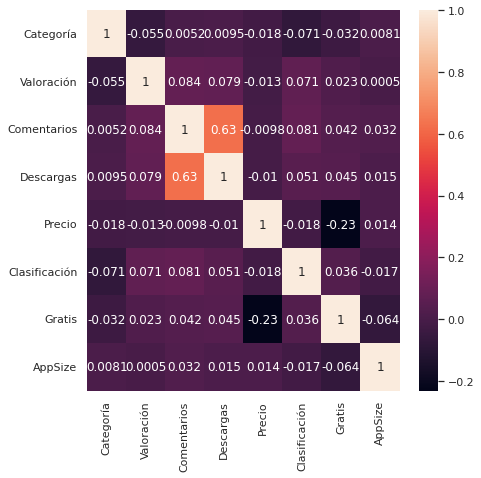

In [29]:
sns.set(
    rc={
        'figure.figsize':(7,7)
    }
)
sns.heatmap(
    df_final.corr(),
    annot=True
)

# Implemente sus modelos desde aquí

## 1er Modelo

Definimos este modelo desde las variables comentarios y descargas de las APP, ya que presentan mayor correlación "0,63"

In [30]:
caracteristicas = df_final[['Comentarios',
                      'Valoración']]
label = df_final['Descargas'].astype(int)
print(caracteristicas)
print(label)

      Comentarios  Valoración
0              48         4.8
1             353         4.7
2           36815         4.1
3          194216         4.3
4           13880         4.4
...           ...         ...
9136           69         3.0
9137           34         4.3
9138       165299         4.3
9139        35560         4.2
9140       136626         4.1

[9141 rows x 2 columns]
0           5000
1          10000
2        1000000
3        5000000
4        1000000
          ...   
9136       10000
9137        1000
9138    10000000
9139     5000000
9140    10000000
Name: Descargas, Length: 9141, dtype: int64


In [31]:
# Separamos la información para el entrenamiento de los datos
datos_entre, datos_prueba, eti_entre, eti_prueba = train_test_split(
    caracteristicas,
    label,
    test_size=0.33,
    random_state=2
)
print('Los datos para entrenamiento son :',datos_entre.shape)
print('Los datos para prueba son :',datos_prueba.shape)
print('Los eti para entrenamiento son :',eti_entre.shape)
print('Los eti para prueba son :',eti_prueba.shape)

Los datos para entrenamiento son : (6124, 2)
Los datos para prueba son : (3017, 2)
Los eti para entrenamiento son : (6124,)
Los eti para prueba son : (3017,)


In [32]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [33]:
# Entrenamieto de los modelos
# DecisionTreeRegressor
# LinearRegression
# KNeighborsRegressor
# RandomForestRegressor 
# KNeighbors Classifier
# RandomForestClassifier
# Support Vector Machine

modelos = []
modelos.append(("DecisionTreeRegressor",DecisionTreeRegressor()))
modelos.append(("RandomForestRegressor",RandomForestRegressor())) 
modelos.append(("RandomForestClassifier",RandomForestClassifier()))
modelos.append(("Support Vector Machine", SVC()))
modelos.append(("KNeighborsClassifier",KNeighborsClassifier()))
for nombre,modelo in modelos:
  modelo.fit(datos_entre,eti_entre)
  resultado = modelo.score(datos_prueba,eti_prueba)
  print("El modelo {mol} tiene un rendimiento del {ren:.2f}%".format(
      mol=nombre,
      ren=resultado*100
  ))

El modelo DecisionTreeRegressor tiene un rendimiento del 74.16%
El modelo RandomForestRegressor tiene un rendimiento del 78.38%
El modelo RandomForestClassifier tiene un rendimiento del 47.86%
El modelo Support Vector Machine tiene un rendimiento del 21.91%
El modelo KNeighborsClassifier tiene un rendimiento del 44.75%


De lo anterior podemos dar cuenta que los modelos más optimos son 

*   DecisionTreeRegressor 
*   RandomForestRegressor

con 74,28% y 77,92% de prediccion respectivamente


##NORMALIZACION

In [34]:
## Normalizacion de los datos.
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler().fit(datos_entre)
datos_entre_n = MinMax.transform(datos_entre)
datos_prueba_n = MinMax.transform(datos_prueba)

##ESTANDARIZACIÓN

In [35]:
## Estandarizacion 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(datos_entre)
datos_entre_s = scale.transform(datos_entre)
datos_prueba_s = scale.transform(datos_prueba)

#MODELOS DE REGRESION

##ARBOL DE DECISION REGRESION

In [36]:
Dtr = DecisionTreeRegressor()
Dtr.fit(datos_entre , eti_entre)
y_pred_Dtr = Dtr.predict(datos_prueba)

mse = mean_squared_error(eti_prueba,y_pred_Dtr)
r2 = r2_score(eti_prueba, y_pred_Dtr)
print('Error Cuadratico medio: ',mse)
## Rendimiento del modelo en porcentaje.
print('R2 Score: %',r2 * 100)

Error Cuadratico medio:  318571695669746.9
R2 Score: % 74.16747378312034


In [37]:
Dtr = RandomForestRegressor()
Dtr.fit(datos_entre_n,eti_entre)
y_pred_Dtr_n = Dtr.predict(datos_prueba_n)

mse = mean_squared_error(eti_prueba,y_pred_Dtr_n)
r2 = r2_score(eti_prueba, y_pred_Dtr_n)
print('Error Cuadratico medio: ',mse)
## Rendimiento del modelo en porcentaje.
print('R2 Score: %',r2 * 100)

Error Cuadratico medio:  220031319143786.16
R2 Score: % 82.15797292233754


In [38]:
Dtr = DecisionTreeRegressor()
Dtr.fit(datos_entre_s,eti_entre)
y_pred_Dtr_s = Dtr.predict(datos_prueba_s)

mse = mean_squared_error(eti_prueba,y_pred_Dtr_s)
r2 = r2_score(eti_prueba, y_pred_Dtr_s)
print('Error Cuadratico medio: ',mse)
## Rendimiento del modelo en porcentaje.
print('R2 Score: %',r2 * 100)

Error Cuadratico medio:  319290821255054.06
R2 Score: % 74.10916091104731


##RANDOM FOREST REGRESSOR

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
Rft = RandomForestRegressor()
Rft.fit(datos_entre,eti_entre)
y_pred_rft = Rft.predict(datos_prueba)

mse = mean_squared_error(eti_prueba,y_pred_rft)
r2 = r2_score(eti_prueba, y_pred_rft)
print('Error Cuadratico medio: ',mse)
## Rendimiento del modelo en porcentaje.
print('R2 Score: %',r2 * 100)

Error Cuadratico medio:  278428001538233.38
R2 Score: % 77.42266890933695


In [41]:
Rft = RandomForestRegressor()
Rft.fit(datos_entre_n,eti_entre)
y_pred_rft_n = Rft.predict(datos_prueba_n)

mse = mean_squared_error(eti_prueba,y_pred_rft_n)
r2 = r2_score(eti_prueba, y_pred_rft_n)
print('Error Cuadratico medio: ',mse)
## Rendimiento del modelo en porcentaje.
print('R2 Score: %',r2 * 100)

Error Cuadratico medio:  250603605524743.7
R2 Score: % 79.67890965280979


In [42]:
Rft = RandomForestRegressor()
Rft.fit(datos_entre_s,eti_entre)
y_pred_rft_s = Rft.predict(datos_prueba_s)

mse = mean_squared_error(eti_prueba,y_pred_rft_s)
r2 = r2_score(eti_prueba, y_pred_rft_s)
print('Error Cuadratico medio: ',mse)
## Rendimiento del modelo en porcentaje.
print('R2 Score: %',r2 * 100)

Error Cuadratico medio:  303406626189637.94
R2 Score: % 75.397187722716


##VECINOS MÁS CERCANOS (REGRESION)

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
## Aplicacion de modelo con datos sin normalizar ni estandarizar.
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(datos_entre,eti_entre)
y_pred_knn = knn.predict(datos_prueba)

mse = mean_squared_error(eti_prueba,y_pred_knn)
r2 = r2_score(eti_prueba, y_pred_knn)
print('Error Cuadratico medio: ',mse)
## Rendimiento del modelo en porcentaje.
print('R2 Score: %',r2 * 100)

Error Cuadratico medio:  1020641606623190.6
R2 Score: % 17.23762211296923


In [45]:
## Aplicacion de modelo con datos normalizados.
# knn = KNeighborsRegressor()
knn.fit(datos_entre_n,eti_entre)
y_pred_knn_n = knn.predict(datos_prueba_n)

mse = mean_squared_error(eti_prueba,y_pred_knn_n)
r2 = r2_score(eti_prueba, y_pred_knn_n)
print('Error Cuadratico medio: ',mse)
## Rendimiento del modelo en porcentaje.
print('R2 Score: %',r2 * 100)

Error Cuadratico medio:  578478622033772.5
R2 Score: % 53.091990366013654


In [46]:
# knn = KNeighborsRegressor()
knn.fit(datos_entre_s,eti_entre)
y_pred_knn_s = knn.predict(datos_prueba_s)

mse = mean_squared_error(eti_prueba,y_pred_knn_s)
r2 = r2_score(eti_prueba, y_pred_knn_s)
print('Error Cuadratico medio: ',mse)
## Rendimiento del modelo en porcentaje.
print('R2 Score: %',r2 * 100)

Error Cuadratico medio:  1041734066730042.5
R2 Score: % 15.527264488311976


#MODELOS DE CLASIFICACION

##RANDOM FOREST CLASSIFIER

In [47]:
#Modelo Rnmd Forest Classifier con los datos crudos.
RndF = RandomForestClassifier()
RndF.fit(datos_entre,eti_entre)
Y_pred_rfc = RndF.predict(datos_prueba)
print(f"Precisión de la predicción %.2f" %(RndF.score(datos_entre, eti_entre)*100),"%")

Precisión de la predicción 86.19 %


In [48]:
# Random Forest Classifier con los datos normalizados
RndF_norm = RandomForestClassifier()
RndF_norm.fit(datos_entre_n,eti_entre)
Y_pred = RndF_norm.predict(datos_prueba_n)
print(f"Precisión de la predicción %.2f" %(RndF_norm.score(datos_entre_n, eti_entre)*100),"%")

Precisión de la predicción 75.98 %


In [49]:
# Random Forest Classifier con los datos estandarizados
RndF_stand = RandomForestClassifier()
RndF_stand.fit(datos_entre_s,eti_entre)
Y_pred = RndF_stand.predict(datos_prueba_s)
print(f"Precisión de la predicción %.2f" %(RndF_stand.score(datos_entre_s, eti_entre)*100),"%")

Precisión de la predicción 86.17 %


##SVM (Support Vector Machine)

In [50]:
# Modelo Support Vector Machine con los datos crudos.
#Llamamos al modelo y le asignamos una variable, en este caso svc
svc = SVC()
# Aqui entrenamos al modelo usando el comando fit.
svc.fit(datos_entre, eti_entre)
# Realizamos las predicciones para probar nuestro modelo con el comando predict.
Y_pred_svc = svc.predict(datos_prueba)
print(f"Precisión de la predicción %.2f" %(svc.score(datos_entre, eti_entre)*100),"%")

Precisión de la predicción 21.91 %


In [51]:
# Modelo Support Vector Machine con los datos normalizados.
svc_norm = SVC()
svc_norm.fit(datos_entre_n, eti_entre)
Y_pred_svc_norm = svc_norm.predict(datos_prueba_n)
print(f"Precisión de la predicción %.2f" %(svc_norm.score(datos_entre_n, eti_entre)*100),"%")

Precisión de la predicción 21.36 %


In [52]:
# Modelo Support Vector Machine con los datos estandarizados.
svc_stand = SVC()
svc_stand.fit(datos_entre_s, eti_entre)
Y_pred_stand = svc_stand.predict(datos_prueba_s)
print(f"Precisión de la predicción %.2f" %(svc_stand.score(datos_entre_s, eti_entre)*100),"%")

Precisión de la predicción 28.07 %


## VECINOS MÁS CERCANOS (CLASIFICACION)

In [53]:
from sklearn import metrics
# Para descubrir el k=n que utilizaremos haremos un loop y veremos cual nos da mejor resultado.
k_range = range(1, 26)
# Creamos un arreglo llamado datos que guardara los mismos para poder graficar luego.
datos = []

# Y ahora usamos el modelo en un for.
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(datos_entre, eti_entre)
    eti_pred = knn.predict(datos_prueba)
    #Con este comando podemos sacar el porcentaje de exito del modelo con cada k.
    datos.append(metrics.accuracy_score(eti_prueba, eti_pred))

print(datos)

[0.42890288365926416, 0.3907855485581704, 0.4252568776930726, 0.4421610871726881, 0.44746436857805766, 0.45707656612529, 0.458733841564468, 0.47398077560490554, 0.4736493205170699, 0.4855817036791515, 0.47630096121975474, 0.4835929731521379, 0.4809413324494531, 0.47862114683460394, 0.48491879350348027, 0.4839244282399735, 0.4812727875372887, 0.48856479946967185, 0.4855817036791515, 0.4875704342061651, 0.4879018892940007, 0.4918793503480278, 0.49320517069937025, 0.49221080543586343, 0.49121644017235666]


Los datos mostrados anteriormente son demasiado ambiguos como para tomar una decision por lo cual procedemos a graficarlos.

Text(0, 0.5, 'Tasa de exito')

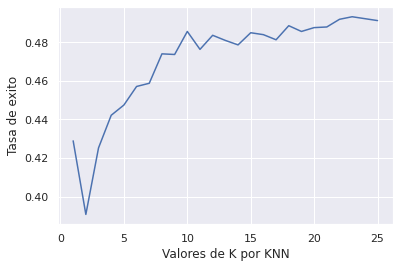

In [54]:
# importamos el pyplot
import matplotlib.pyplot as plt

%matplotlib inline

# Realizamos la relacion entre K y la tasa de exito
plt.plot(k_range, datos)
plt.xlabel('Valores de K por KNN')
plt.ylabel('Tasa de exito')

In [55]:
## Utilizamos el siguiente K=N ya que es el
## que mejor resultado nos muestra en el grafico
n_neighbors = 22
 
knn = KNeighborsClassifier(n_neighbors)
#Reemplazamos con los datos crudos.
knn.fit(datos_entre, eti_entre)
print('Precision del K-NN: {:.2f}'
     .format(knn.score(datos_entre, eti_entre)))

Precision del K-NN: 0.52


In [56]:
## Vecinos más cercanos con datos normalizados.
k_range = range(1, 26)
datos = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(datos_entre_n, eti_entre)
    y_pred = knn.predict(datos_prueba_n)
    datos.append(metrics.accuracy_score(eti_prueba, y_pred))

print(datos)

[0.45011600928074247, 0.41465031488233345, 0.4411667219091813, 0.462048392442824, 0.4607225720914816, 0.46635730858468677, 0.46403712296983757, 0.47596950613191913, 0.4822671528007955, 0.4809413324494531, 0.4792840570102751, 0.4819356977129599, 0.4855817036791515, 0.49254226052369904, 0.49121644017235666, 0.49022207490884984, 0.48823334438183624, 0.4872389791183295, 0.4895591647331787, 0.49088498508452105, 0.4875704342061651, 0.49022207490884984, 0.48922770964534307, 0.49154789526019227, 0.4879018892940007]


Text(0, 0.5, 'Tasa de exito')

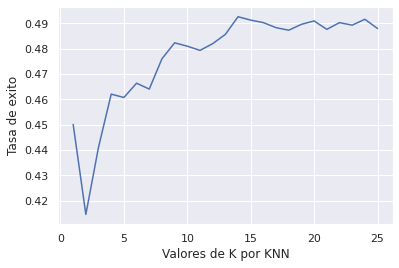

In [57]:
plt.plot(k_range, datos)
plt.xlabel('Valores de K por KNN')
plt.ylabel('Tasa de exito')

In [58]:
n_neighbors = 13
 
knn_norm = KNeighborsClassifier(n_neighbors)
#Reemplazamos con los datos normalizados
knn_norm.fit(datos_entre_n, eti_entre)
print('Precision del K-NN: {:.2f}'
     .format(knn_norm.score(datos_entre_n, eti_entre)))

Precision del K-NN: 0.54


In [59]:
k_range = range(1, 26)
datos = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(datos_entre_s, eti_entre)
    y_pred = knn.predict(datos_prueba_s)
    datos.append(metrics.accuracy_score(eti_prueba, y_pred))

print(datos)

[0.45077891945641363, 0.41697050049718265, 0.4421610871726881, 0.4617169373549884, 0.458733841564468, 0.46536294332118, 0.46536294332118, 0.4753065959562479, 0.4822671528007955, 0.4806098773616175, 0.4816042426251243, 0.4852502485913159, 0.48922770964534307, 0.4938680808750414, 0.49287371561153465, 0.49320517069937025, 0.49121644017235666, 0.49221080543586343, 0.49320517069937025, 0.49453099105071263, 0.49055352999668544, 0.49221080543586343, 0.49287371561153465, 0.49685117666556183, 0.49221080543586343]


Text(0, 0.5, 'Tasa de exito')

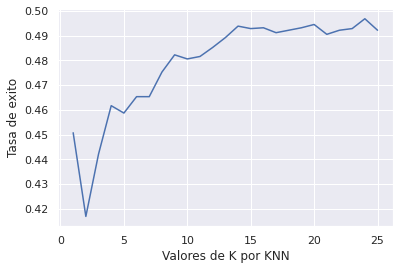

In [60]:
plt.plot(k_range, datos)
plt.xlabel('Valores de K por KNN')
plt.ylabel('Tasa de exito')

In [61]:
n_neighbors = 24
 
knn_stand = KNeighborsClassifier(n_neighbors)
#Reemplazamos con los datos estandarizados.
knn_stand.fit(datos_entre_s, eti_entre)
print('Precision del K-NN: {:.2f}'
     .format(knn_stand.score(datos_entre_s, eti_entre)))

Precision del K-NN: 0.51


# Evalúe sus modelos

# Responda las preguntas planteadas

In [72]:
## 1-Que categoría de app obtuvo mas descargas
## R: La Categoria de 'Familia' Posee la mayor cantidad de descargas
## segun los datos analizados.
print(df.groupby(["Categoría"]).agg({"Descargas":"count"}))
p = df.groupby(["Categoría"]).agg({"Descargas":"count"})
print(p.loc[p["Descargas"]>1500])


                        Descargas
Categoría                        
ARTE Y DISEÑO                  65
BELLEZA                        47
CASA Y HOGAR                   68
CLIMA                          57
COMIDA Y BEBIDA               100
COMPRAS                       201
COMUNICACIÓN                  264
DATOS                         212
DEPORTES                      310
EDUCACIÓN                     124
ENTRETENIMIENTO               102
ESTILO DE VIDA                349
EVENTOS                        57
FAMILIA                      1770
FINANCIERAS                   306
FOTOGRAFÍA                    253
HERRAMIENTAS                  738
HISTORIETAS                    50
JUEGO                        1051
LIBRERIAS                      82
LIBROS Y REFRERENCIAS         197
MAPAS Y NAVEGACIÓN            108
MÉDICO                        433
NEGOCIO                       400
NOTICIAS                      215
PADRES                         53
PERSONALIZACIÓN               356
PRODUCTIVIDAD 

In [144]:
## 2-Qué aplicaciónes obtuvieron mayor valorizacion
p = df_final.groupby(["App"]).agg({"Valoración":'max'})
p.loc[p["Valoración"]>=5]

,Valoración
App,
211:CK,5.0
30WPM Amateur ham radio Koch CW Morse code trainer,5.0
420 BZ Budeze Delivery,5.0
A-Y Collection,5.0
AC DC Power Monitor,5.0
...,...
ei Calc,5.0
i am EB,5.0
iCard BD Plus,5.0


In [64]:
## 3-Qué aplicación obtuvo más comentarios

In [143]:
## 4-Qué tipos de categorías de aplicaciones hay
print(df["Categoría"].unique())

['ARTE Y DISEÑO' 'BELLEZA' 'CASA Y HOGAR' 'CLIMA' 'COMIDA Y BEBIDA'
 'COMPRAS' 'COMUNICACIÓN' 'DATOS' 'DEPORTES' 'EDUCACIÓN' 'ENTRETENIMIENTO'
 'ESTILO DE VIDA' 'EVENTOS' 'FAMILIA' 'FINANCIERAS' 'FOTOGRAFÍA'
 'HERRAMIENTAS' 'HISTORIETAS' 'JUEGO' 'LIBRERIAS' 'LIBROS Y REFRERENCIAS'
 'MAPAS Y NAVEGACIÓN' 'MÉDICO' 'NEGOCIO' 'NOTICIAS' 'PADRES'
 'PERSONALIZACIÓN' 'PRODUCTIVIDAD' 'REPRODUCTORES DE VIDEO'
 'SALUD Y BELLEZA' 'SOCIAL' 'VEHICULOS' 'VIAJES']


In [66]:
## 5-Que grupo de personas descarga más apliacciones

In [67]:
## 6-Qué tipo de aplicación tiene mas descargas (Pago/gratis)
## R: Las aplicaciones Gratis obtienen más descargas que las aplicaciones
## de pago según los datos analizados..
print(df.groupby(["Tipo"]).agg({"Descargas":"count"}))

        Descargas
Tipo             
Gratis       8417
Pago          724
